# **Income Classification Model**

## Introduction

The income dataset was extracted from 1994 U.S. Census database.

### Objective of the porject
The goal of this excercise is to look for any interesting trends, correlations and other relationships in the data. 


### Import Package and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
income_df = pd.read_csv("adult.csv")
income_df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [3]:
print(income_df.shape)
print(income_df.columns)

(48842, 15)
Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')


In [4]:
income_df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


To keep things simple for this excercise we will explore the relationship of "income" with "age", "education", "marital-status", "race" and "gender". 

In [5]:
income_df2 = income_df.iloc[:,[0,3,5,8,9,14]]
print(income_df2.head(), end='\n\n\n')
print(income_df2.shape, end='\n\n\n')
print(income_df2.info())

   age     education      marital-status   race  gender income
0   25          11th       Never-married  Black    Male  <=50K
1   38       HS-grad  Married-civ-spouse  White    Male  <=50K
2   28    Assoc-acdm  Married-civ-spouse  White    Male   >50K
3   44  Some-college  Married-civ-spouse  Black    Male   >50K
4   18  Some-college       Never-married  White  Female  <=50K


(48842, 6)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   education       48842 non-null  object
 2   marital-status  48842 non-null  object
 3   race            48842 non-null  object
 4   gender          48842 non-null  object
 5   income          48842 non-null  object
dtypes: int64(1), object(5)
memory usage: 2.2+ MB
None


In [6]:
# Checking for null values in these columns
income_df2.isnull().sum()

age               0
education         0
marital-status    0
race              0
gender            0
income            0
dtype: int64

In [7]:
print(income_df2['education'].unique())
print(income_df2['marital-status'].unique())
print(income_df2['race'].unique())
print(income_df2['gender'].unique())
print(income_df2['income'].unique())


['11th' 'HS-grad' 'Assoc-acdm' 'Some-college' '10th' 'Prof-school'
 '7th-8th' 'Bachelors' 'Masters' 'Doctorate' '5th-6th' 'Assoc-voc' '9th'
 '12th' '1st-4th' 'Preschool']
['Never-married' 'Married-civ-spouse' 'Widowed' 'Divorced' 'Separated'
 'Married-spouse-absent' 'Married-AF-spouse']
['Black' 'White' 'Asian-Pac-Islander' 'Other' 'Amer-Indian-Eskimo']
['Male' 'Female']
['<=50K' '>50K']


In [8]:
income_df2['education'].replace(to_replace='Preschool', value='dropout',inplace=True)
income_df2['education'].replace(to_replace='10th', value='dropout',inplace=True)
income_df2['education'].replace(to_replace='11th', value='dropout',inplace=True)
income_df2['education'].replace(to_replace='12th', value='dropout',inplace=True)
income_df2['education'].replace(to_replace='1st-4th', value='dropout',inplace=True)
income_df2['education'].replace(to_replace='5th-6th', value='dropout',inplace=True)
income_df2['education'].replace(to_replace='7th-8th', value='dropout',inplace=True)
income_df2['education'].replace(to_replace='9th', value='dropout',inplace=True)
income_df2['education'].replace(to_replace='HS-Grad', value='HighGrad',inplace=True)
income_df2['education'].replace(to_replace='HS-grad', value='HighGrad',inplace=True)
income_df2['education'].replace(to_replace='Some-college', value='CommunityCollege',inplace=True)
income_df2['education'].replace(to_replace='Assoc-acdm', value='CommunityCollege',inplace=True)
income_df2['education'].replace(to_replace='Assoc-voc', value='CommunityCollege',inplace=True)
income_df2['education'].replace(to_replace='Prof-school', value='Masters',inplace=True)

C:\Users\Bharat\AppData\Local\Temp\ipykernel_18980\4188848746.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  income_df2['education'].replace(to_replace='Preschool', value='dropout',inplace=True)
C:\Users\Bharat\AppData\Local\Temp\ipykernel_18980\4188848746.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  income_df2['education'].replace(to_replace='10th', value='dropout',inplace=True)
C:\Users\Bharat\AppData\Local\Temp\ipykernel_18980\4188848746.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-

In [9]:
income_df2['marital-status'].replace(to_replace='Never-married', value='NotMarried',inplace=True)
income_df2['marital-status'].replace(to_replace='Married-AF-spouse', value='Married',inplace=True)
income_df2['marital-status'].replace(to_replace='Married-civ-spouse', value='Married',inplace=True)
income_df2['marital-status'].replace(to_replace='Married-spouse-absent', value='NotMarried',inplace=True)
income_df2['marital-status'].replace(to_replace='Separated', value='Separated',inplace=True)
income_df2['marital-status'].replace(to_replace='Divorced', value='Separated',inplace=True)
income_df2['marital-status'].replace(to_replace='Widowed', value='Widowed',inplace=True)

C:\Users\Bharat\AppData\Local\Temp\ipykernel_18980\2320058715.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  income_df2['marital-status'].replace(to_replace='Never-married', value='NotMarried',inplace=True)
C:\Users\Bharat\AppData\Local\Temp\ipykernel_18980\2320058715.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  income_df2['marital-status'].replace(to_replace='Married-AF-spouse', value='Married',inplace=True)
C:\Users\Bharat\AppData\Local\Temp\ipykernel_18980\2320058715.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: htt

In [10]:
print(income_df2['education'].unique())
print(income_df2['marital-status'].unique())
print(income_df2['race'].unique())
print(income_df2['gender'].unique())
print(income_df2['income'].unique())

['dropout' 'HighGrad' 'CommunityCollege' 'Masters' 'Bachelors' 'Doctorate']
['NotMarried' 'Married' 'Widowed' 'Separated']
['Black' 'White' 'Asian-Pac-Islander' 'Other' 'Amer-Indian-Eskimo']
['Male' 'Female']
['<=50K' '>50K']


### Education

<Axes: xlabel='count', ylabel='education'>

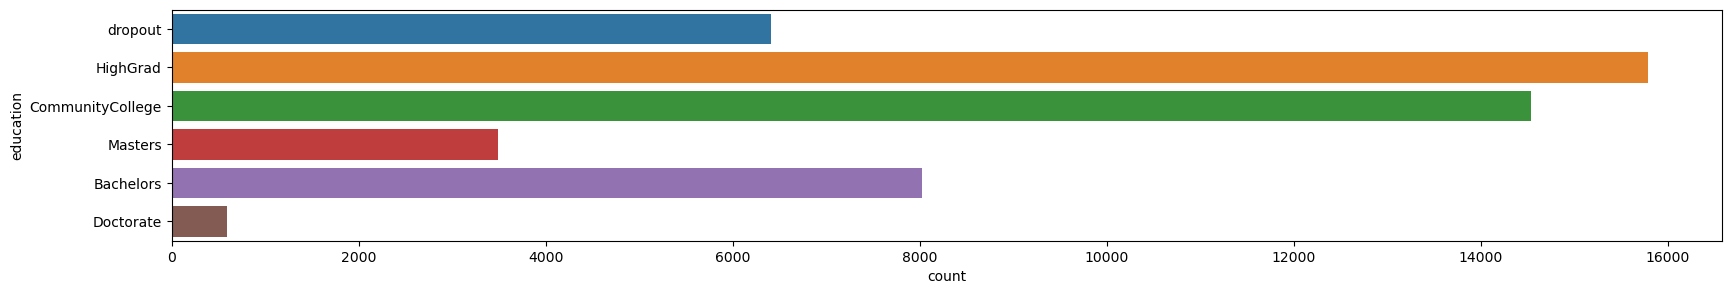

In [11]:
fig = plt.figure(figsize=(20,3))
sns.countplot(y="education", data=income_df2)

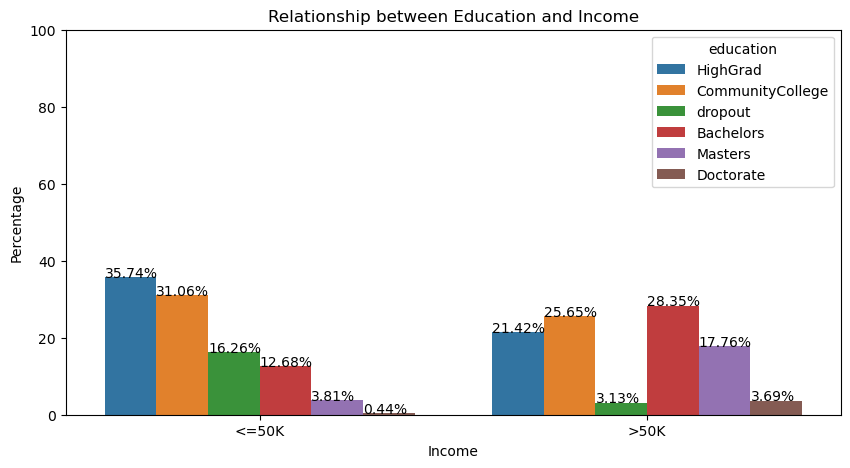

In [16]:
df2_education = income_df2.groupby("income")['education'].value_counts(normalize=True).mul(100)
df2_education = df2_education.rename('Percentage').reset_index()

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,5))
p1 = sns.barplot(x="income", y="Percentage", hue="education", data=df2_education)
p1.set_title("Relationship between Education and Income")
p1.set_xlabel('Income')
p1.set_ylabel('Percentage')
p1.set_ylim(0,100)
for i in p1.patches:
    txt = str(i.get_height().round(2)) + '%'
    txt_x = i.get_x() 
    txt_y = i.get_height()
    p1.text(txt_x,txt_y,txt)

### Marital-status

<Axes: xlabel='count', ylabel='marital-status'>

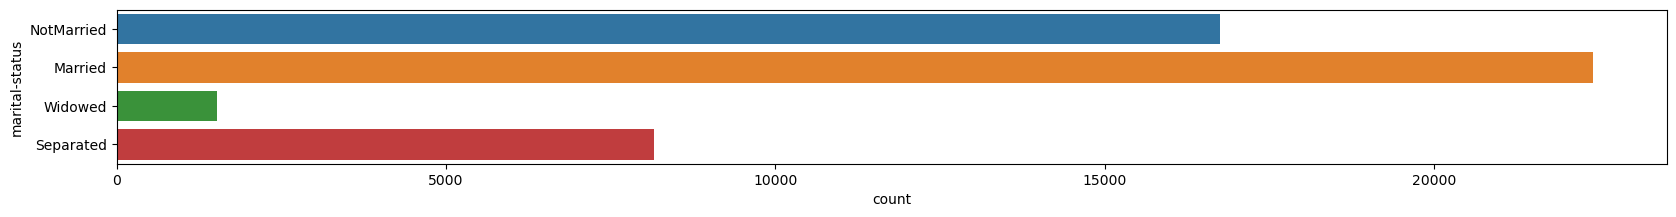

In [17]:
fig = plt.figure(figsize=(20,2))
sns.countplot(y="marital-status", data=income_df2)

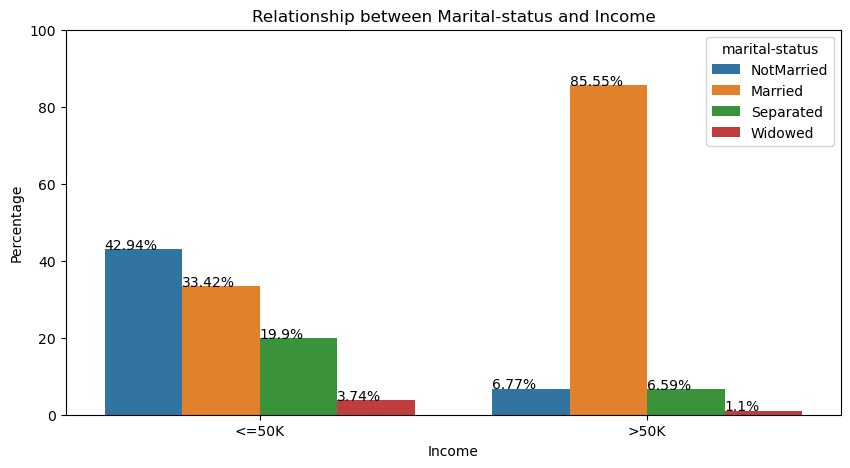

In [20]:
df2_marital = income_df2.groupby("income")['marital-status'].value_counts(normalize=True).mul(100)
df2_marital = df2_marital.rename('Percentage').reset_index()

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,5))
p1 = sns.barplot(x="income", y="Percentage", hue="marital-status", data=df2_marital)
p1.set_title("Relationship between Marital-status and Income")
p1.set_xlabel('Income')
p1.set_ylabel('Percentage')
p1.set_ylim(0,100)
for i in p1.patches:
    txt = str(i.get_height().round(2)) + '%'
    txt_x = i.get_x() 
    txt_y = i.get_height()
    p1.text(txt_x,txt_y,txt)

### age

In [21]:
# make the age variable discretized 
income_df2['age_bin'] = pd.cut(income_df2['age'], 20)

C:\Users\Bharat\AppData\Local\Temp\ipykernel_18980\1414161762.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  income_df2['age_bin'] = pd.cut(income_df2['age'], 20)


C:\Users\Bharat\AppData\Local\Temp\ipykernel_18980\2444571676.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-ticks')
C:\Users\Bharat\AppData\Local\Temp\ipykernel_18980\2444571676.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(income_df2[income_df2['income'] == '>50K']['age'], kde_kws={"label": ">$50K"})
C:\Users\Bharat\AppData\Local\Temp\ipykernel_18980\2444571676.py:7: UserWarnin

<Axes: xlabel='age', ylabel='Density'>

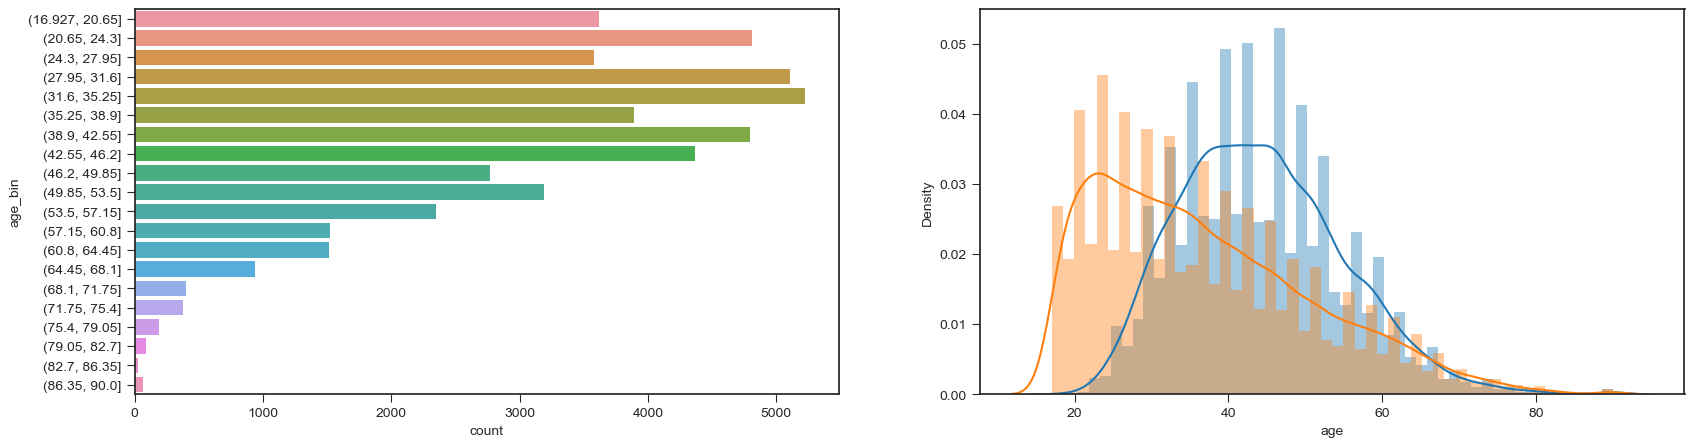

In [22]:
plt.style.use('seaborn-ticks')
fig = plt.figure(figsize=(20,5)) 
plt.subplot(1, 2, 1)
sns.countplot(y="age_bin", data=income_df2)
plt.subplot(1, 2, 2)
sns.distplot(income_df2[income_df2['income'] == '>50K']['age'], kde_kws={"label": ">$50K"})
sns.distplot(income_df2[income_df2['income'] == '<=50K']['age'], kde_kws={"label": "<=$50K"})

In [23]:
income_df2[['income', 'age']].groupby(['income'], as_index=False).mean().sort_values(by='age', ascending=False)

,income,age
1,>50K,44.275178
0,<=50K,36.872184


### Race

C:\Users\Bharat\AppData\Local\Temp\ipykernel_18980\408057080.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


<Axes: xlabel='race', ylabel='income'>

<Figure size 2000x500 with 0 Axes>

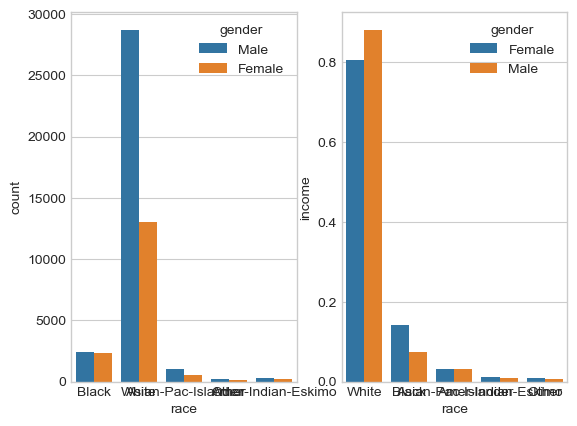

In [24]:
plt.style.use('seaborn-whitegrid')
x, y, hue = "race", "income", "gender"
#hue_order = ["Male", "Female"]
plt.figure(figsize=(20,5)) 
f, axes = plt.subplots(1, 2)
sns.countplot(x=x, hue=hue, data=income_df2, ax=axes[0])

prop_df = (income_df2[x]
           .groupby(income_df2[hue])
           .value_counts(normalize=True)
           .rename(y)
           .reset_index())

sns.barplot(x=x, y=y, hue=hue, data=prop_df, ax=axes[1])


### Race vs. Income Level

<Axes: xlabel='race', ylabel='age'>

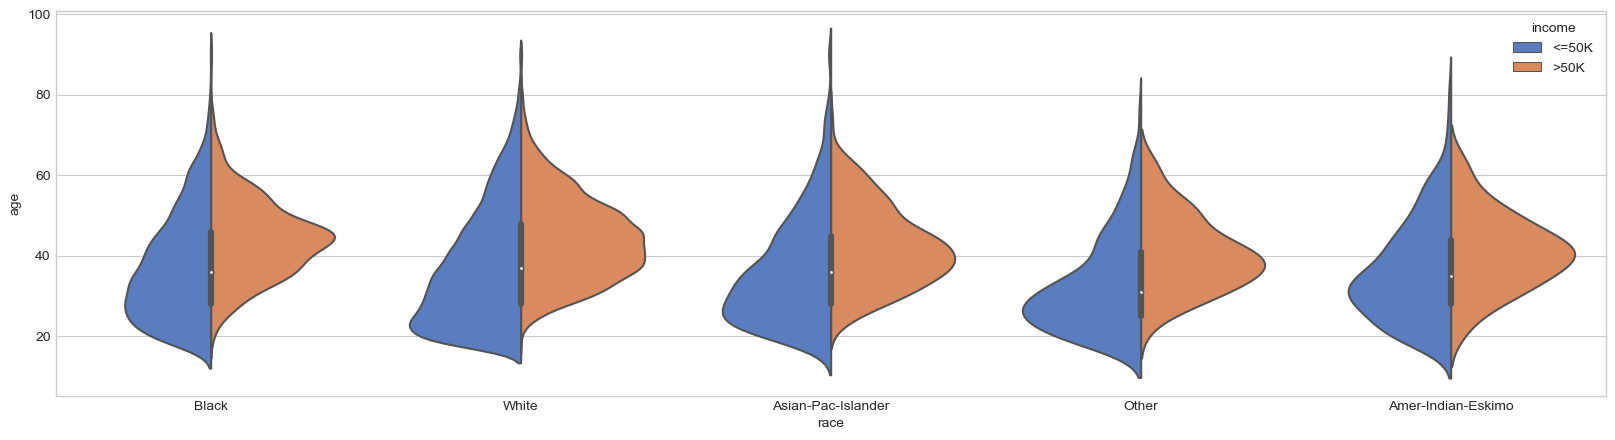

In [25]:
from matplotlib import pyplot
a4_dims = (20, 5)
fig, ax = pyplot.subplots(figsize=a4_dims)
ax = sns.violinplot(x="race", y="age", hue="income",
                    data=income_df2, gridsize=100, palette="muted", split=True, saturation=0.75)
ax

We can observe several interesting trends form the plots shown above such as:

    - people with higher education level are more likely to earn >50k
    - married people are more liekly to earn >50k than rest
    - Age ~= 40 is when peak income is earned and age ~= 20 is when income is least
    - intersting trends can be seen in race vs income vs gender as well. 
    
    